<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Code-/blob/main/%EC%83%81%EC%A0%90_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%EB%A7%A4%EC%B6%9C_Solution%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/funda_train.csv')
submission = pd.read_csv('/content/submission.csv')

In [ ]:
train.shape

(6556613, 9)

In [ ]:
train.tail()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571
6556612,2136,4658616,c,2019-02-28,23:54,0,제주 제주시,기타 주점업,5857.142857


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [ ]:
train.describe()

,store_id,card_id,installment_term,amount
count,6.556613e+06,6.556613e+06,6.556613e+06,6.556613e+06
mean,1.084930e+03,2.268127e+06,1.382017e-01,1.043511e+04
std,6.152183e+02,1.351058e+06,1.188152e+00,3.104031e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.771429e+06
25%,5.860000e+02,1.088828e+06,0.000000e+00,2.142857e+03
50%,1.074000e+03,2.239304e+06,0.000000e+00,4.285714e+03
75%,1.615000e+03,3.438488e+06,0.000000e+00,8.571429e+03
max,2.136000e+03,4.663856e+06,9.300000e+01,5.571429e+06


### 자체 개발 EDA

In [ ]:
def calcul_column_len(df,colname): # unique 데이터 갯수 반환
  df_col = df[colname]
  cols = df_col.unique()
  return len(cols)

In [ ]:
for i in train.columns:
  result_str = f'{i} 수: ' + str(calcul_column_len(train,i))
  print(result_str)

store_id 수: 1967
card_id 수: 3950001
card_company 수: 8
transacted_date 수: 1003
transacted_time 수: 1440
installment_term 수: 34
region 수: 181
type_of_business 수: 146
amount 수: 30551


## 분석 환경 설정 ( 1등 알고리즘 ) 

In [ ]:
pip install tzlocal

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 6.6 MB/s 
     |████████████████████████████████| 9.5 MB 38.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip install statsmodels

In [ ]:
pip install tqdm

In [ ]:
import rpy2

In [ ]:
rpy2.__version__

'3.4.5'

In [ ]:
import pandas as pd
import numpy as np

pd.__version__, np.__version__

('1.1.5', '1.19.5')

In [ ]:
import pmdarima

pmdarima.__version__

'1.8.2'

In [ ]:
import statsmodels
import tqdm
import seaborn as sns

statsmodels.__version__, tqdm.__version__, sns.__version__

('0.12.2', '4.62.0', '0.11.1')

## 4.2 데이터 전처리

In [ ]:
from tqdm import tqdm 
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


### tqdm이란??

> 파이썬으로 어떤 작업을 수행중인데, 프로그램이 내가 의도한 데로 돌아가고 있는 중인가, 진행상황이 궁금할 때가 있다. 시간이 걸리는 작업의 경우에 더 이런 상태 확인이 필요하다. 
파이썬 모듈중에 tqdm이라는 것이 이 용도로 쓰이고 있다.

> 출처: https://skillmemory.tistory.com/17 [세상탐험대 블로그]

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

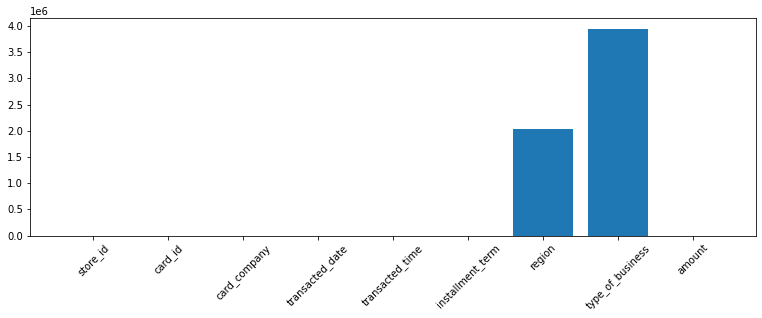

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation=45)

In [ ]:
### 열 전체 제거

In [ ]:
train = train.drop(['region','type_of_business'],axis=1)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0,1857.142857
1,0,1,h,2016-06-01,18:12,0,857.142857
2,0,2,c,2016-06-01,18:52,0,2000.000000
3,0,3,a,2016-06-01,20:22,0,7857.142857
4,0,4,c,2016-06-02,11:06,0,2000.000000


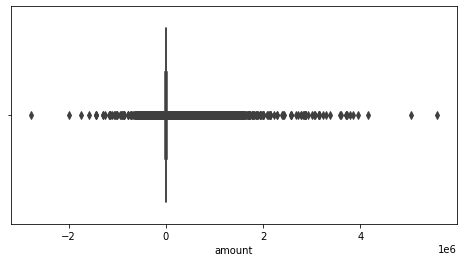

In [ ]:
### 매출액 이상치 확인

plt.figure(figsize=(8,4))
sns.boxplot(train['amount'])

In [ ]:
### 매출액<0 , 환불 일어난 행
train[train['amount']<0].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
41,0,40,a,2016-06-10,17:26,2,-8571.428571
347,0,285,a,2016-08-04,17:52,0,-1857.142857
731,0,473,g,2016-10-17,10:32,0,-2000.000000
831,0,230,b,2016-11-03,15:36,0,-85.714286
944,0,138,a,2016-11-28,13:21,0,-57.142857


### 주요 전처리 모듈 1. 양수 이전 매출액 + 음수 환불 액 제거

In [ ]:
train['datetime'] = pd.to_datetime(train.transacted_date+" "+train.transacted_time,format='%Y-%m-%d %H:%M:%S')

In [ ]:
def remove_refund(df):
  refund = df[df['amount']<0] # 매출액 음숫값 데이터 추출
  non_refund = df[df['amount']>0]
  removed_data = pd.DataFrame()
  for i in tqdm(df.store_id.unique()):
    # 매출액이 양숫값인 데이터를 상점별로 나눈다.
    divided_data = non_refund[non_refund['store_id']==i]
    # 매출액이 음숫값인 데이터를 상점별로 나눈다.
    divided_data2 = refund[refund['store_id']==i]
    
    # i(상점)별로 밑의 코드 실행

    for neg in divided_data2.to_records()[:]: # 환불 데이터를 차례대로 검사한다.
      refund_store = neg['store_id'] # 음숫값인 상점의 store_id를 불러온다.
      refund_id = neg['card_id'] # 음숫값인 상점에서 환불한 카드 아이디 추출
      refund_datetime = neg['datetime'] # 환불 시간을 추출한다. (년월일 시분초)
      refund_amount = abs(neg['amount']) # 매출 음숫값의 절댓값을 구한다.

      # neg(환불상점의 거래)별로 밑의 코드 실행

      # 환불 시간 이전의 데이터 중 카드 아이디와 환불액이 같은 후보 리스트를 추출
      refund_pay_list = divided_data[divided_data['datetime']<refund_datetime] # 양수중 환불 이전 시간
      refund_pay_list = refund_pay_list[refund_pay_list['card_id']==refund_id] # 환불거래와 카드id 동일
      refund_pay_list = refund_pay_list[refund_pay_list['amount']==refund_amount] # # 환불거래와 액수 동일
      
      # 후보 리스트가 있으면 카드 아이디, 환불액이 같으면서 가장 최근시간을
      # 제거 한다.
      if len(refund_pay_list)!=0:
        # 가장 최근 시간
        refund_datetime = max(refund_pay_list['datetime'])
        # 가장 최근 환불 양수 리스트
        noise_list = divided_data[divided_data['datetime']==refund_datetime]
        # 환불 양수 카드 id도 동일
        noise_list = noise_list[noise_list['card_id']==refund_id]
        # 환불 액수
        noise_list = noise_list[noise_list['amount']==refund_amount]
        # 인덱스를 통해 제거
        divided_data = divided_data.drop(index=noise_list.index)
      # 제거한 데이터를 최종 결과 df에 추가
      removed_data = pd.concat([removed_data,divided_data],axis=0)
    return removed_data

  0%|          | 0/1967 [00:00<?, ?it/s]


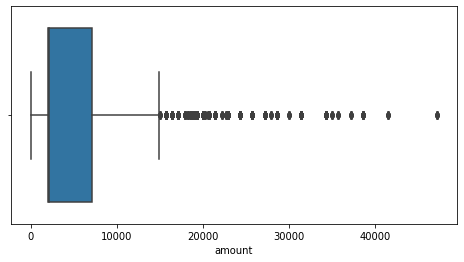

In [ ]:
positive_data = remove_refund(train)
plt.figure(figsize=(8,4))
sns.boxplot(positive_data['amount'])

### 다운 샘플링

> 목적 : 향후 3개월간 상점 매출의 '총합'구하기. 시간 간격을 좁게하여 예측의 불확실성을 줄이겠음

In [ ]:
positive_data.head()

In [1]:
## 월 단위 다운 샘플링 함수 정의
def month_resampling(df):
  new_data = pd.DataFrame()
  # 년도와 월을 합친 변수
  df['year_month'] = df['transacted_date'].str.slice(stop=7)
  # 데이터의 전체 기간
  year_month = df['year_month'].drop_duplicates()
  # 상점 아이디별로 월 단위 매출액 총합을 구한다.
  downsampling_data = df.groupby(['store_id','year_month']).amount.sum()
  downsampling_data = pd.DataFrame(downsampling_data)
  downsampling_data = downsampling_data.reset_index(drop=False,inplace=False)

  for i in tqdm(df.store_id.unique()):
    # 상점별로 데이터를 처리한다.
    store = downsampling_data[downsampling_data['store_id']==i]
    # 각 상점의 처음 매출이 발생한 월을 구한다.
    start_time = min(store['year_month'])
    # 모든 상점을 전체 기간 데이터로 만든다.
    store = store.merge(year_month,how='outer')
    # 데이터를 시간순으로 정렬한다.
    store = store.sort_values(by=['year_month'],axis=0, ascending=False)
    # 매출이 발생하지 않는 월은 2로 채운다.  << Why? :
    store['amount'] = store['amount'].fillna(2)
    # 상점 아이디 결측치를 채운다 
    store['store_id'] = store['store_id'].fillna(i)
    # 처음 매출이 발생한 월 이후만 뽑는다.
    store = store[store['year_month']>=start_time]

    new_data = pd.concat([new_data,store],axis=0)
  return new_data

In [ ]:
resampling_data = month_resampling(positive_data)
resampling_data['store_id'] = resampling_data['store_id'].astype(int)
resampling_data # 다운 샘플링 간격(현재 1달)이 적절한지 확인이 필요함

### 날짜 지정 범위 생성 및 시리즈 객체 변환

> 시계열 데이터 분석을 위해선 DF를 Series객체로 변환해야함.

> ※ 정상성 확인을 위한 단위근 검정과 시계열 모델 구축 과정에서 Series 객체를 사용함.

> 변환 Process 
1. 인덱스 날짜 지정 범위 설정(몇날 몇일부터 시작?)
2. DF의 index를 시간 변수로 변환 ((by)pd.data_range 함수)

In [ ]:
print(type(resampling_data)) # 데이터 프레임 형태

In [2]:
## DF -> Series 변환 함수
def time_series(df,i):
  # 상점별로 데이터를 뽑는다
  store = df[df['store_id']==i]
  ## 날짜 지정 범위는 영업 시작월부터 2019년 3월 전까지 영업 마감일 기준
  index = pd.data_range(min(store['year_month']),'2019-03',freq='BM') # freq=BM? >
  ## 시리즈 객체로 변환
  ts = pd.Series(store['amount'].values,index=index)
  return ts

In [ ]:
# 상점 아이디가 0번인 데이터를 시리즈 객체로 변환
store_0 = time_series(resampling_data,0)
store_0

In [ ]:
# 데이터 타입을 출력
store_1 = time_series(resampling_data,1)
print(type(store_1))

In [ ]:
# 상점 아이디가 2번인 데이터를 시리즈 객체로 변환
store_2 = time_series(resampling_data,2)
store_2.plot()

## 4.3 EDA